In [71]:
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np


with open("mei.csv", 'r', encoding="utf-8") as read_: #read다음에_는 의미가 없다. read랑 헷갈리지말라고 쓴 것. a 라고 해도 무방.
    text=read_.readlines()

rows=[]
for i in text[1:]:
    rows.append(list(map(int,i.split(",")[:-1])))
print(i)

df=pd.DataFrame(rows)
df.columns=["sensor%d"%i for i in range(1,17)]

with open("조진호.csv", 'r', encoding="utf-8") as read_:
    text2=read_.readlines()
    

rows2=[]
for i in text2[1:]:
    rows2.append(list(map(int,i.split(",")[:-1])))
print(i)

with open("최주원.csv", 'r', encoding="utf-8") as read_:
    text3=read_.readlines()
    
rows3=[]
for i in text3[1:]:
    rows3.append(list(map(int,i.split(",")[:-1])))
print(i)

df2=pd.DataFrame(rows2)
df2.columns=["sensor%d"%i for i in range(1,17)]


df3=pd.DataFrame(rows3)
df3.columns=["sensor%d"%i for i in range(1,17)]




52,54,58,62,63,66,68,70,68,70,70,73,74,75,77,78,Mei
65,68,66,68,71,74,74,76,72,74,74,75,76,77,80,80,조진호
51,55,58,60,66,67,67,69,68,70,74,73,78,76,78,80,최주원


(20, 16)
(18, 16) (2, 16)


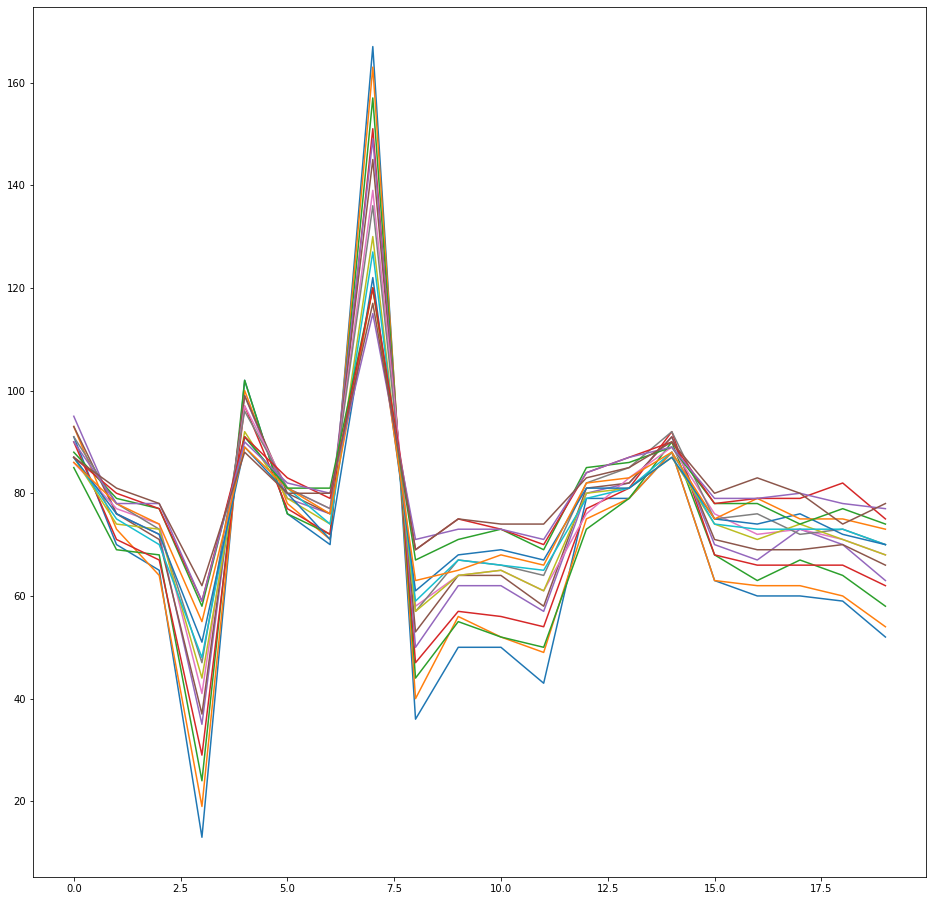

In [74]:
import pandas as pd
import numpy as np
from sklearn import datasets
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
import numpy as np
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Reshape
import pandas as pd
import numpy as np
import keras
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
from keras.preprocessing.sequence import TimeseriesGenerator
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

image1 = df.astype('float')
image2 = df2.astype('float')

n_channel_1=16
n_channel_2=32
n_dense=32
n_train_epoch=10

y1 = ['sensor1','sensor2','sensor3','sensor4','sensor5','sensor6','sensor7','sensor8','sensor9','sensor10','sensor11','sensor12','sensor13','sensor14','sensor15','sensor16'] # define y variable, i.e., what we want to predict
print(df.shape) # print the number of rows anc columns
df.head()

plt.figure(figsize=(16,16))
plt.plot(range(len(df)),df[y1]);






(18, 16) (2, 16)


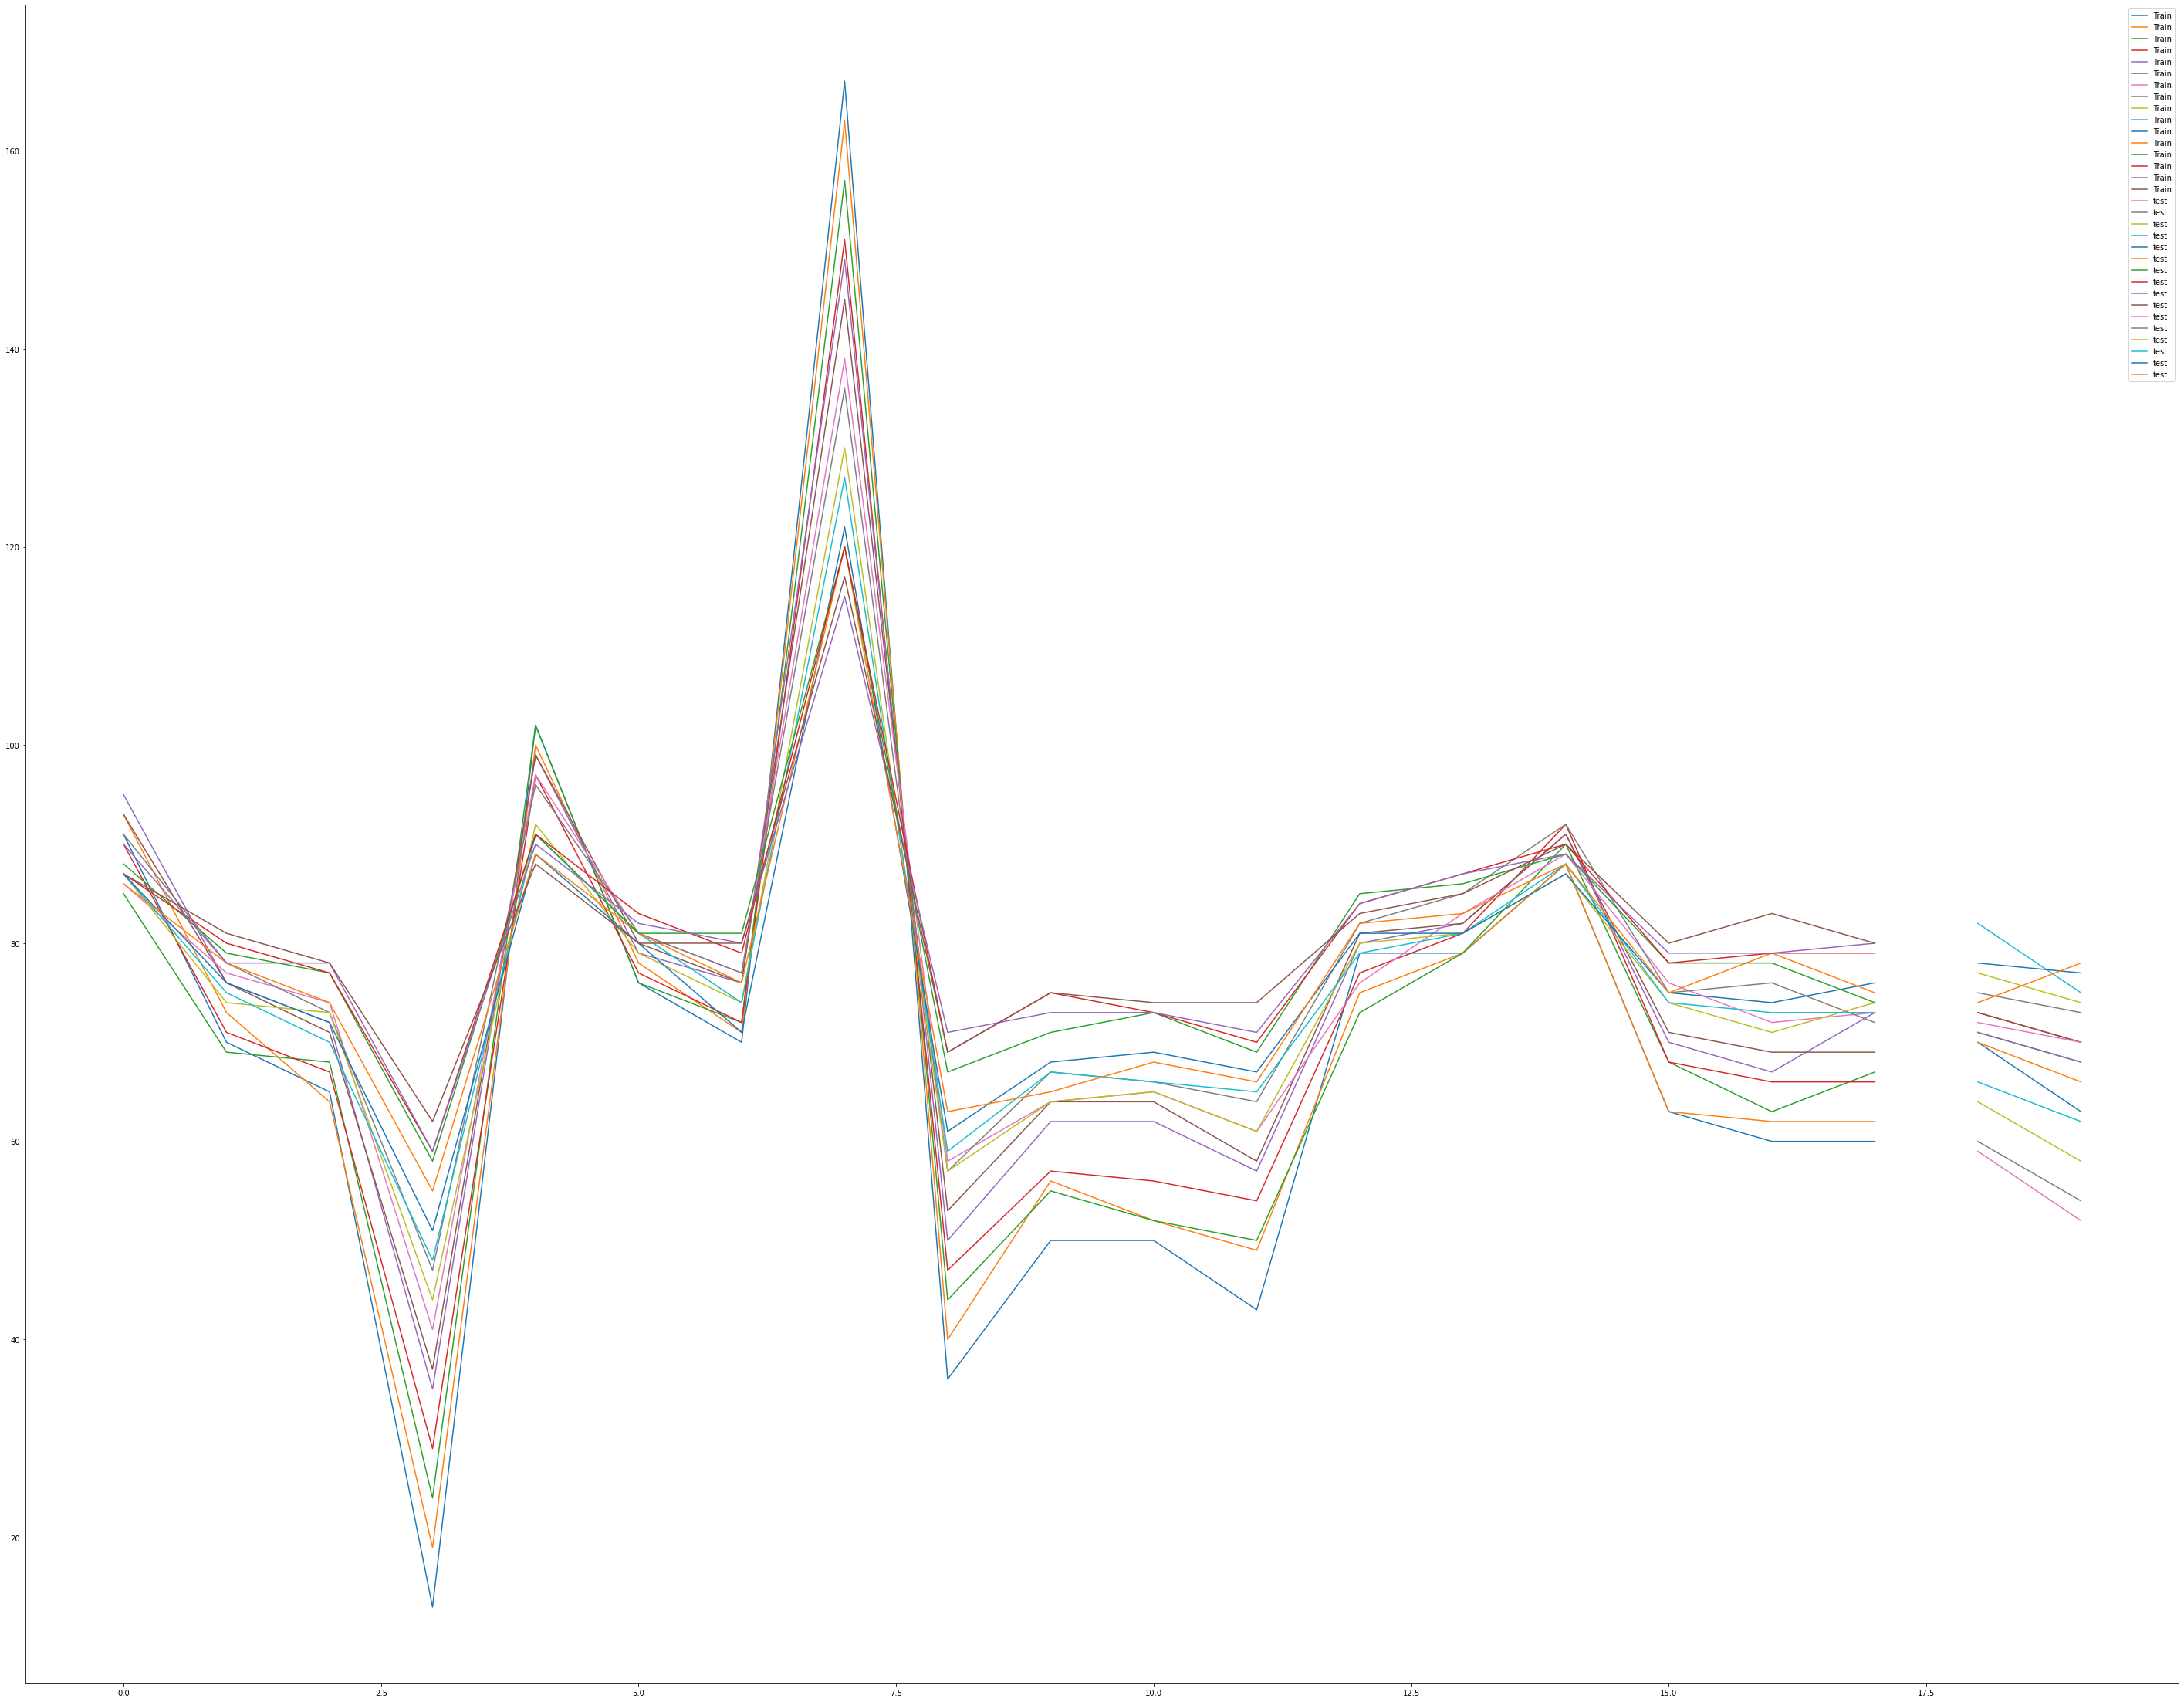

In [76]:
test_size = int(len(df) * 0.1) # the test data will be 10% (0.1) of the entire data
train = df.iloc[:-test_size,:].copy() 
# the copy() here is important, it will prevent us from getting: SettingWithCopyWarning: A value is trying to be set on a copy of a slice from a DataFrame. Try using .loc[row_index,col_indexer] = value instead
test = df.iloc[-test_size:,:].copy()

print(train.shape, test.shape)

plt.figure(figsize=(50,40))
plt.plot(train.index,train[y1],label='Train');
plt.plot(test.index,test[y1],label='test')
plt.legend();

In [81]:
X_train = train.drop(y1,axis=1).copy()
y_train = train(y).copy() # the double brakets here are to keep the y in a dataframe format, otherwise it will be pandas Series
print(y1.shape, y_train.shape)

Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

TypeError: 'DataFrame' object is not callable

In [65]:


X_train = train.drop(y1,axis=1).copy()
y_train = train[y1].copy() # the double brakets here are to keep the y in a dataframe format, otherwise it will be pandas Series
print(X_train.shape, y_train.shape)


Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)




# model=keras.models.Sequential()
# model.add(Reshape((1,df.shape[1],1)))
# model.add(Conv2D(filters = 32, kernel_size = (1,5),padding = 'Same',
#              activation ='relu', input_shape = (1,df.shape[1],1)))
# model.add(keras.layers.MaxPool2D(pool_size = (1,2), strides = (1,2)))
# model.add(keras.layers.Conv2D(n_channel_2, (2,2), activation='relu'))
# model.add(keras.layers.MaxPooling2D(pool_size = (2,2), strides = (2,2)))
# model.add(keras.layers.Flatten())
# model.add(keras.layers.Dense(n_dense, activation='relu'))
# model.add(keras.layers.Dense(n_dense, activation='softmax'))


# model.compile(loss='binary_crossentropy', optimizer='adam',
#               metrics=['accuracy'])


# model.fit(np.array(image1), np.array(image2),epochs= 10, validation_data=(np.array(image1), np.array(image2)))


(0, 0) (0, 16)


ValueError: at least one array or dtype is required

(18, 0) (18, 16)


ValueError: at least one array or dtype is required

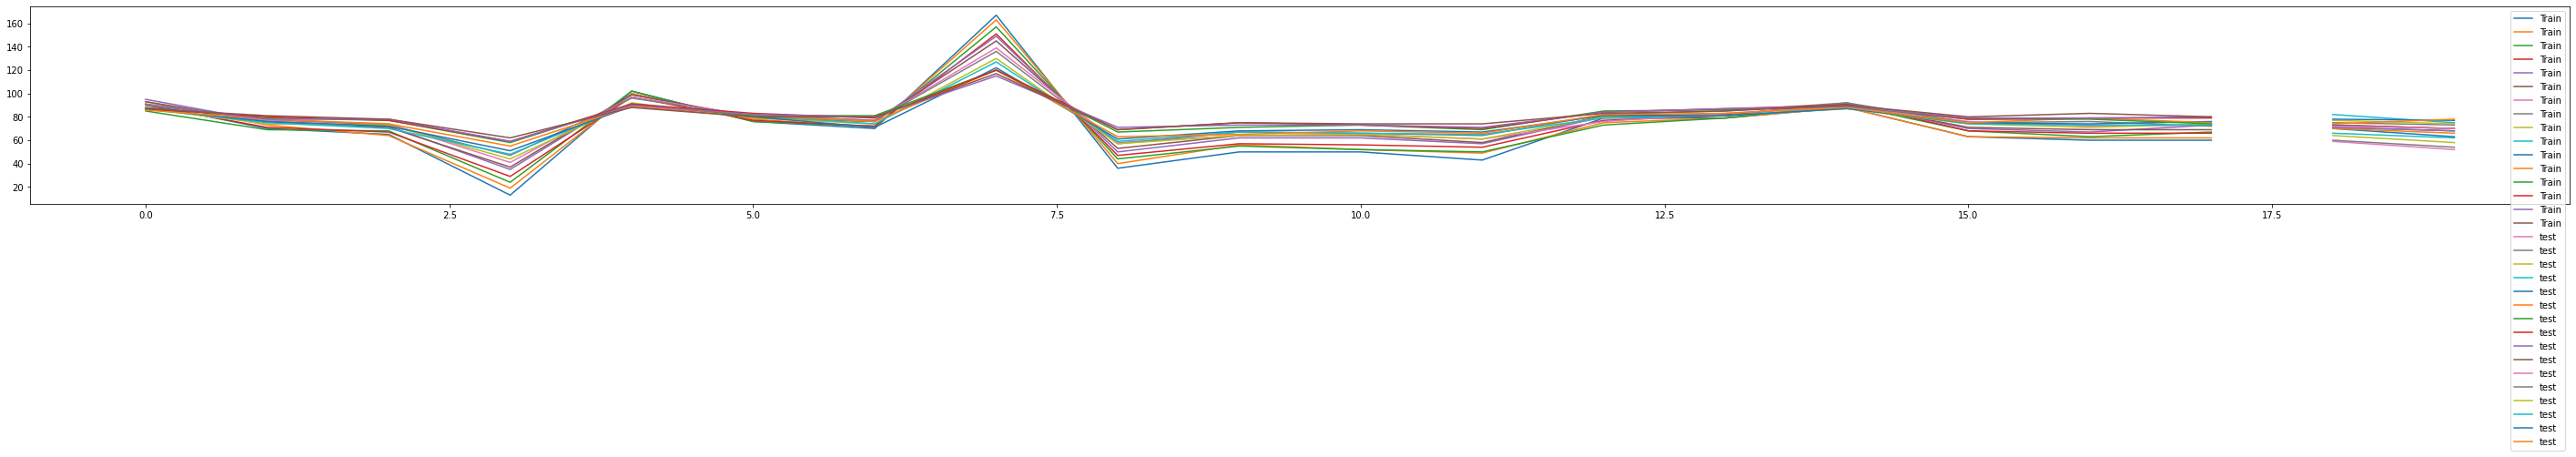

In [62]:
plt.figure(figsize=(50,4))
plt.plot(train.index,train[y1],label='Train');
plt.plot(test.index,test[y1],label='test')
plt.legend();

X_train = train.drop(y1,axis=1).copy()
y_train = train[y1].copy() # the double brakets here are to keep the y in a dataframe format, otherwise it will be pandas Series
print(X_train.shape, y_train.shape)


Xscaler = MinMaxScaler(feature_range=(0, 1)) # scale so that all the X data will range from 0 to 1
Xscaler.fit(X_train)
scaled_X_train = Xscaler.transform(X_train)
print(X_train.shape)
Yscaler = MinMaxScaler(feature_range=(0, 1))
Yscaler.fit(y_train)
scaled_y_train = Yscaler.transform(y_train)
print(scaled_y_train.shape)
scaled_y_train = scaled_y_train.reshape(-1) # remove the second dimention from y so the shape changes from (n,1) to (n,)
print(scaled_y_train.shape)

scaled_y_train = np.insert(scaled_y_train, 0, 0)
scaled_y_train = np.delete(scaled_y_train, -1)

n_input = 25 #how many samples/rows/timesteps to look in the past in order to forecast the next sample
n_features= X_train.shape[1] # how many predictors/Xs/features we have to predict y
b_size = 32 # Number of timeseries samples in each batch
generator = TimeseriesGenerator(scaled_X_train, scaled_y_train, length=n_input, batch_size=b_size)

print(generator[0][0].shape)

model = Sequential()
model.add(LSTM(150, activation='relu', input_shape=(n_input, n_features)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
model.summary()